In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Base de dados para Case 1_ Games - Liste na tabela todos os exemplos.csv to Base de dados para Case 1_ Games - Liste na tabela todos os exemplos.csv


In [3]:
# Lê o arquivo csv trazido pelo upload
df = pd.read_csv('Base de dados para Case 1_ Games - Liste na tabela todos os exemplos.csv')

In [5]:
# Renomeia coluna vendas para melhor manipulação
df.rename(columns={'Vendas Globais (milhões)': 'Vendas'}, inplace=True)

In [6]:
df.head()

,Nome,Plataforma,Ano,Gênero,Publisher,Vendas
0,Super Mario Galaxy,Wii,2007,Platform,Nintendo,11.35
1,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,13.52
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.09
3,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,20.32
4,Minecraft,PC,2011,Misc,Mojang,25.50


In [7]:
#Procura entradas nulas na coluna ano, retornando falso, assim nenhuma entrada possuí erros

df["Ano"].isnull().any()

np.False_

In [8]:
# Soma as vendas por gêneros diferentes
soma_vendas = df.groupby("Gênero")["Vendas"].sum()

print(soma_vendas)

Gênero
Action               59.95
Action-Adventure    134.03
Action-RPG           87.50
Battle Royale       175.00
Fighting             32.01
MMORPG               14.00
MOBA                100.00
Metroidvania          3.00
Misc                 77.52
Party                10.00
Platform             94.68
Puzzle               46.81
Racing               67.00
Role-Playing        150.80
Shooter             209.16
Simulation          100.82
Sports               84.03
Survival Horror       5.80
Name: Vendas, dtype: float64


In [9]:
linha_max = soma_vendas.idxmax() # Pega a linha de maior valor
valor_max = soma_vendas[linha_max] # Pega o maior valor
print(f"Gênero com mais vendas: {linha_max}, Vendas totais: {valor_max:.2f} milhões")

Gênero com mais vendas: Shooter, Vendas totais: 209.16 milhões


In [10]:
# Agrupa por número de aparições por plataforma
contagem = df.groupby("Plataforma")["Nome"].count()

print(contagem)

Plataforma
2600     1
DS       3
GB       2
N64      3
NES      1
NS       6
PC      21
PS       3
PS2      4
PS3      2
PS4      9
PS5      2
SNES     3
Wii      4
X360     7
XB       1
Name: Nome, dtype: int64


In [11]:
linha_max = contagem.idxmax()   # Pega a linha de maior valor
valor_max = contagem[linha_max] # Pega o maior valor
print(f"Plataforma com mais jogos: {linha_max}, Jogos totais: {valor_max}")

Plataforma com mais jogos: PC, Jogos totais: 21


In [12]:
# Cria uma lista e agrupa cada ano pela década correspondente

lista = []

for ano in df['Ano']:
    if 1980 <= ano <= 1989:
        lista.append('Anos 80')
    elif 1990 <= ano <= 1999:
        lista.append('Anos 90')
    elif 2000 <= ano <= 2009:
        lista.append('Anos 2000')
    elif 2010 <= ano <= 2019:
        lista.append('Anos 2010')
    elif 2020 <= ano <= 2029:
        lista.append('Anos 2020')
    else:
        lista.append('Outros')

df['Década'] = lista # Cria uma coluna nova

In [13]:
df.head()

,Nome,Plataforma,Ano,Gênero,Publisher,Vendas,Década
0,Super Mario Galaxy,Wii,2007,Platform,Nintendo,11.35,Anos 2000
1,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,13.52,Anos 2000
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.09,Anos 2000
3,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,20.32,Anos 2010
4,Minecraft,PC,2011,Misc,Mojang,25.50,Anos 2010


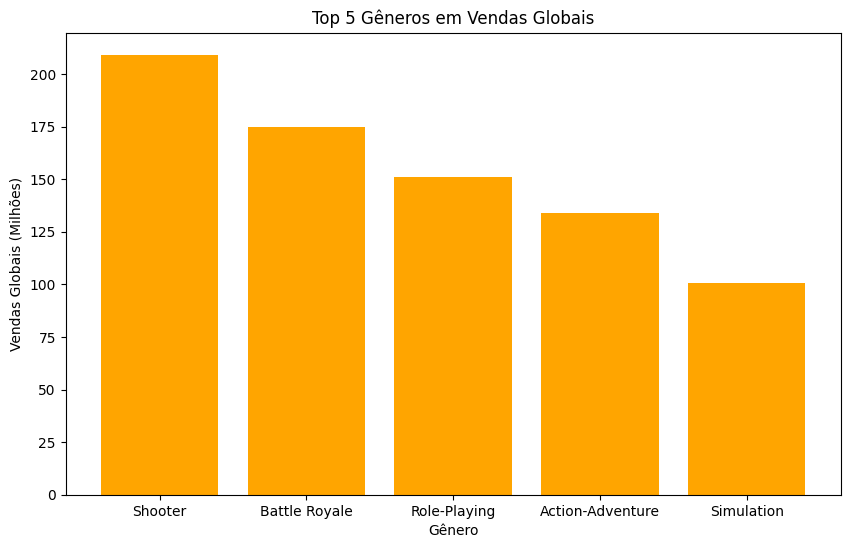

In [16]:
# Agrupar novamente, mas deixando as colunas explícitas
soma_vendas = df.groupby("Gênero", as_index=False)["Vendas"].sum()
top5 = soma_vendas.nlargest(5, 'Vendas')

plt.figure(figsize=(10, 6))
plt.bar(top5['Gênero'], top5['Vendas'], color='orange')
plt.title('Top 5 Gêneros em Vendas Globais')
plt.ylabel('Vendas Globais (Milhões)')
plt.xlabel('Gênero')
plt.show()

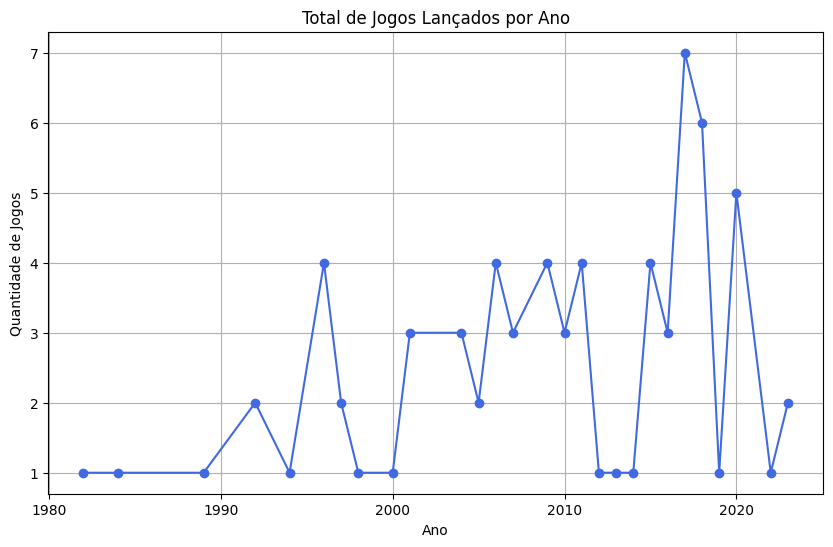

In [18]:
jogos_por_ano = df.groupby('Ano').size()                         # Agrupa o número de entradas por ano
jogos_por_ano = jogos_por_ano.reset_index(name='Total de Jogos') # Reseta o índice e troca o nome

plt.figure(figsize=(10, 6))
plt.plot(jogos_por_ano['Ano'], jogos_por_ano['Total de Jogos'], marker='o', color='royalblue')

plt.title('Total de Jogos Lançados por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Jogos')
plt.grid(True)
plt.show()

## CONCLUSÃO

A análise dos dados revelou que o gênero Shooter é o mais vendido globalmente, com leve vantagem em relação aos outros gêneros. Em relação às plataformas, o PC foi o que apresentou o maior número de jogos lançados, com um grande domínio em relação as outras plataformas, refletindo o fácil acesso a plataforma pelo público geral. A distribuição temporal mostrou que o volume de lançamentos cresceu de forma consistente, alcançando o ápice pelo meior da década de 2010, indicando uma forte expansão da indústria nesse período, assim como uma maior quantidade de jogos no mercado.